In [15]:
import pandas as pd

df = pd.read_csv('bestsellers_ with_ categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [16]:
import seaborn as sns

In [17]:
# Display basic information
print("DataFrame Info:")
df.info()
print("\nMissing Values:\n", df.isnull().sum())
print("\nDescriptive Statistics:")
display(df.describe(include='all'))


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB

Missing Values:
 Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

Descriptive Statistics:


,Name,Author,User Rating,Reviews,Price,Year,Genre
count,550,550,550.000000,550.000000,550.000000,550.000000,550
unique,351,248,NaN,NaN,NaN,NaN,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,NaN,NaN,NaN,NaN,Non Fiction
freq,10,12,NaN,NaN,NaN,NaN,310
mean,NaN,NaN,4.618364,11953.281818,13.100000,2014.000000,NaN
std,NaN,NaN,0.226980,11731.132017,10.842262,3.165156,NaN
min,NaN,NaN,3.300000,37.000000,0.000000,2009.000000,NaN
25%,NaN,NaN,4.500000,4058.000000,7.000000,2011.000000,NaN
50%,NaN,NaN,4.700000,8580.000000,11.000000,2014.000000,NaN
75%,NaN,NaN,4.800000,17253.250000,16.000000,2017.000000,NaN


In [18]:
# # Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [19]:
# Value counts for categorical columns
print("\nGenre Value Counts:\n", df['Genre'].value_counts())
print("\nYear Value Counts:\n", df['Year'].value_counts())


Genre Value Counts:
 Genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64

Year Value Counts:
 Year
2016    50
2011    50
2018    50
2017    50
2019    50
2014    50
2010    50
2009    50
2015    50
2013    50
2012    50
Name: count, dtype: int64


In [20]:
# Correlation matrix
print("\nCorrelation Matrix:")
display(df.corr(numeric_only=True))


Correlation Matrix:


,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


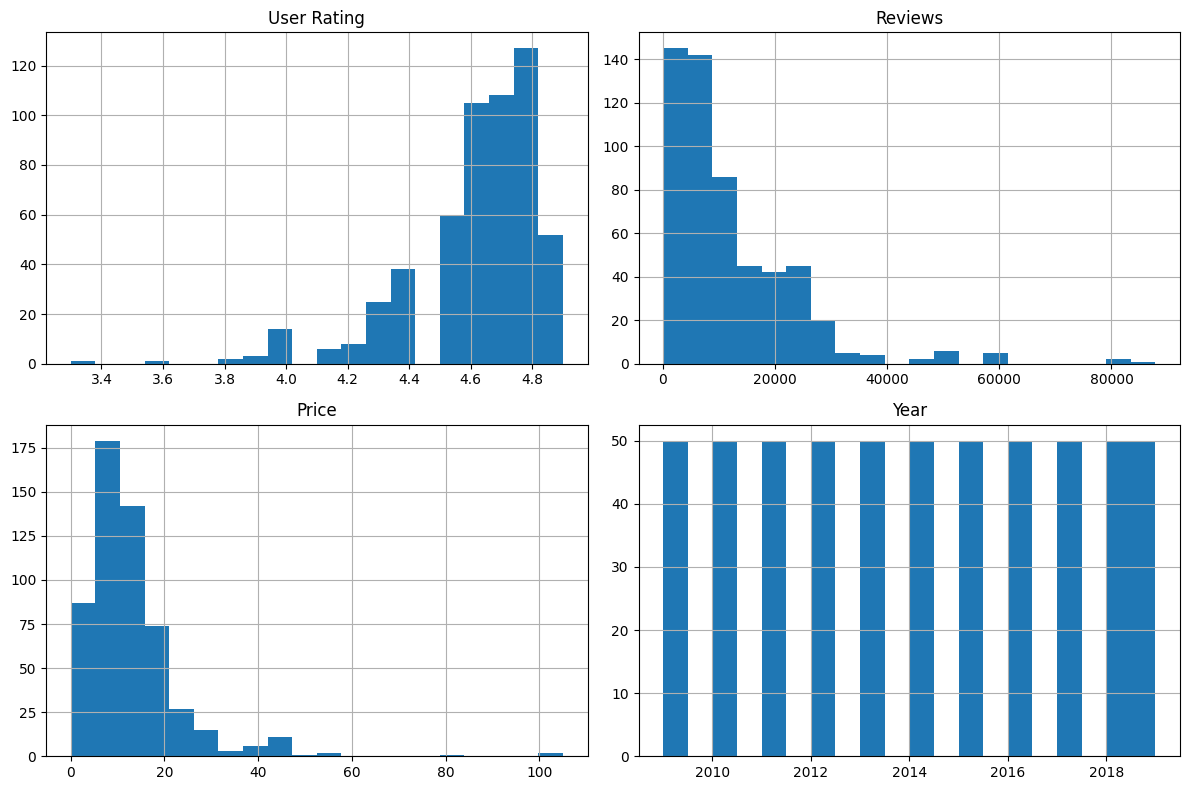

In [21]:
# Visualizations
import matplotlib.pyplot as plt

# # Distribution of numerical features
num_cols = ['User Rating', 'Reviews', 'Price', 'Year']
df[num_cols].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

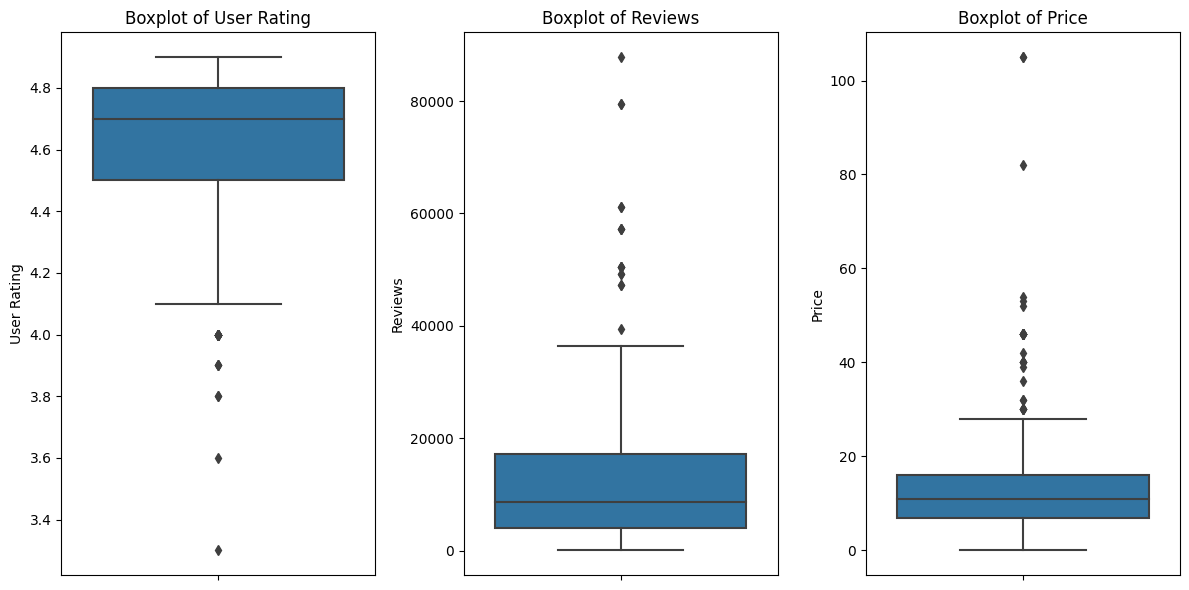

In [22]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols[:-1], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

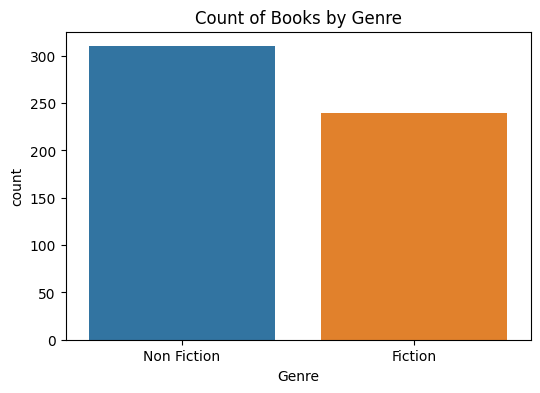

In [23]:
# Countplot for Genre
plt.figure(figsize=(6, 4))
sns.countplot(x='Genre', data=df)
plt.title('Count of Books by Genre')
plt.show()

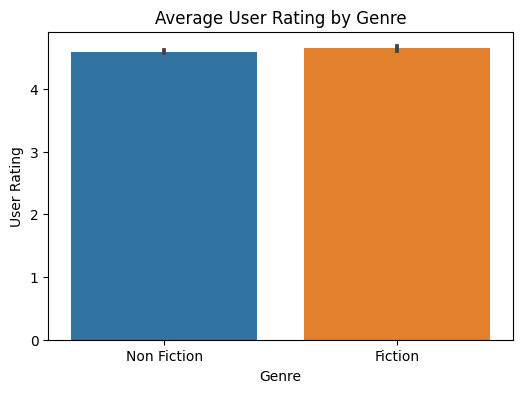

In [24]:
# Average User Rating by Genre
plt.figure(figsize=(6, 4))
sns.barplot(x='Genre', y='User Rating', data=df)
plt.title('Average User Rating by Genre')
plt.show()

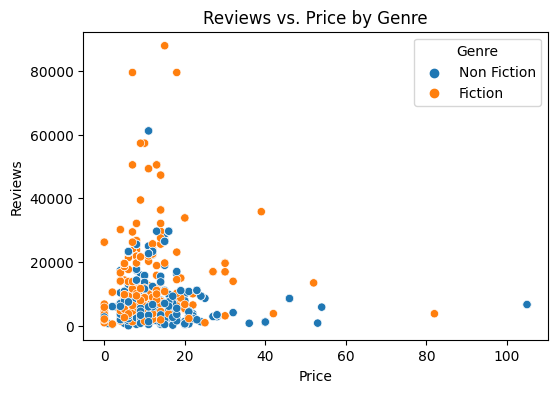

In [25]:
# Reviews vs. Price scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Price', y='Reviews', hue='Genre', data=df)
plt.title('Reviews vs. Price by Genre')
plt.show()

In [26]:
df.info()
df.describe()
df['Genre'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64

In [27]:
# Average User Rating by Genre
df.groupby('Genre')['User Rating'].mean()







# # Maximum User Rating by Author
# df.groupby('Author')['User Rating'].max().sort_values(ascending=False).head(10)

Genre
Fiction        4.648333
Non Fiction    4.595161
Name: User Rating, dtype: float64

In [28]:
# Total Reviews by Year
df.groupby('Year')['Reviews'].sum()

Year
2009    235506
2010    273981
2011    405041
2012    654546
2013    654907
2014    792997
2015    711669
2016    709800
2017    644420
2018    696521
2019    794917
Name: Reviews, dtype: int64

In [29]:
# Count of books by Author
df.groupby('Author')['Name'].count().sort_values(ascending=False).head(10)

Author
Jeff Kinney                           12
Gary Chapman                          11
Suzanne Collins                       11
Rick Riordan                          11
American Psychological Association    10
Gallup                                 9
Dr. Seuss                              9
Rob Elliott                            8
Eric Carle                             7
Bill O'Reilly                          7
Name: Name, dtype: int64

In [30]:
 # Average Price by Genre and Year
df.groupby(['Genre', 'Year'])['Price'].mean()

Genre        Year
Fiction      2009    15.583333
             2010     9.700000
             2011    11.619048
             2012    12.285714
             2013    10.708333
             2014    10.172414
             2015     9.352941
             2016    12.631579
             2017     8.833333
             2018     8.761905
             2019     9.350000
Non Fiction  2009    15.230769
             2010    16.000000
             2011    17.620690
             2012    17.482759
             2013    18.192308
             2014    20.809524
             2015    10.969697
             2016    13.516129
             2017    13.730769
             2018    11.793103
             2019    10.566667
Name: Price, dtype: float64

In [31]:
# Maximum User Rating by Author
df.groupby('Author')['User Rating'].max().sort_values(ascending=False).head(10)

Author
Jeff Kinney              4.9
Dr. Seuss                4.9
J. K. Rowling            4.9
J.K. Rowling             4.9
Patrick Thorpe           4.9
Emily Winfield Martin    4.9
Bill Martin Jr.          4.9
Nathan W. Pyle           4.9
Jill Twiss               4.9
Rush Limbaugh            4.9
Name: User Rating, dtype: float64

In [32]:
# 1. Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 2. Prepare features and target
# (Already done: X, y)

# 3. Split data into train and test sets
# (Already done: X_train, X_test, y_train, y_test)

# 4. Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

# 6. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# 7. (Optional) Feature importance
importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

NameError: name 'X_train' is not defined

# New Expirments

In [ ]:
# Dataset ka size aur column types
print(df.info())

# Null values check karo
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None
Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [ ]:
# Fiction = 0, Non Fiction = 1
df['Genre'] = df['Genre'].map({'Fiction': 0, 'Non Fiction': 1})

In [ ]:
# Convert 'Author' to multiple columns (one-hot encoding)
df_encoded = pd.get_dummies(df, columns=['Author'], drop_first=True)

In [ ]:
# Drop 'Name' (text) and 'Price' (target)
X = df_encoded.drop(['Name', 'Price'], axis=1)

# Target = Price
y = df_encoded['Price']


In [ ]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
# Check missing values in entire DataFrame
print(X.isnull().sum())


User Rating                  0
Reviews                      0
Year                         0
Genre                      550
Author_Adam Gasiewski        0
                          ... 
Author_Walter Isaacson       0
Author_William Davis         0
Author_William P. Young      0
Author_Wizards RPG Team      0
Author_Zhi Gang Sha          0
Length: 251, dtype: int64


In [ ]:
print(df['Genre'].value_counts())

Series([], Name: count, dtype: int64)


In [ ]:
print(df.columns)


Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')


In [ ]:
print(df_encoded.isnull().sum())


Name                       0
User Rating                0
Reviews                    0
Price                      0
Year                       0
                          ..
Author_Walter Isaacson     0
Author_William Davis       0
Author_William P. Young    0
Author_Wizards RPG Team    0
Author_Zhi Gang Sha        0
Length: 253, dtype: int64


In [ ]:
# Fill all numeric NaNs with column mean
df_encoded = df_encoded.fillna(df_encoded.mean(numeric_only=True))

# For non-numeric (like strings, if any), use mode
df_encoded = df_encoded.fillna(df_encoded.mode().iloc[0])


In [ ]:
df_encoded = df_encoded.dropna()


In [ ]:
X = df_encoded.drop(['Name', 'Price'], axis=1)
y = df_encoded['Price']


In [ ]:
print(X.shape)
print(y.shape)

(0, 251)
(0,)


In [ ]:
print(df_encoded.shape)
print(df_encoded.head())

(0, 253)
Empty DataFrame
Columns: [Name, User Rating, Reviews, Price, Year, Genre, Author_Adam Gasiewski, Author_Adam Mansbach, Author_Adir Levy, Author_Admiral William H. McRaven, Author_Adult Coloring Book Designs, Author_Alan Moore, Author_Alex Michaelides, Author_Alice Schertle, Author_Allie Brosh, Author_American Psychiatric Association, Author_American Psychological Association, Author_Amor Towles, Author_Amy Ramos, Author_Amy Shields, Author_Andy Weir, Author_Angie Grace, Author_Angie Thomas, Author_Ann Voskamp, Author_Ann Whitford Paul, Author_Anthony Bourdain, Author_Anthony Doerr, Author_Atul Gawande, Author_Audrey Niffenegger, Author_B. J. Novak, Author_Bessel van der Kolk M.D., Author_Bill Martin Jr., Author_Bill O'Reilly, Author_Bill Simmons, Author_Blue Star Coloring, Author_Bob Woodward, Author_Brandon Stanton, Author_Brené Brown, Author_Brian Kilmeade, Author_Bruce Springsteen, Author_Carol S. Dweck, Author_Celeste Ng, Author_Charlaine Harris, Author_Charles Duhigg, Au

In [ ]:
print(df_encoded.shape)

(0, 253)


In [ ]:
df_encoded = df_encoded.dropna()


In [ ]:
import pandas as pd

# Step 1: Load CSV again (start fresh)
df = pd.read_csv('bestsellers_ with_ categories.csv')

# Step 2: Check initial data
print(df.shape)
print(df.head())


(550, 7)
                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [ ]:
# Fill missing Genre with most frequent
if 'Genre' in df.columns:
    df['Genre'] = df['Genre'].fillna(df['Genre'].mode()[0])
    df['Genre'] = df['Genre'].map({'Fiction': 0, 'Non Fiction': 1})


In [ ]:
df_encoded = pd.get_dummies(df, columns=['Author'], drop_first=True)

In [ ]:
# If 'Name' exists, drop it
if 'Name' in df_encoded.columns:
    X = df_encoded.drop(['Name', 'Price'], axis=1)
else:
    X = df_encoded.drop(['Price'], axis=1)

y = df_encoded['Price']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
print(X_train.shape)  # should show (something > 0, columns)
print(y_train.shape)


(440, 251)
(440,)


# Predictions

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Predict karein test data ke liye
y_pred = model.predict(X_test)

# Step 2: Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")


Mean Squared Error (MSE): 36.53
R-squared Score (R²): 0.76


# Explanation:
# Metric	Matlab
# MSE	Prediction aur real values ke darmiyan difference ka square
# R² (R-squared)	Model ne kitni achi prediction ki — jitna zyada, utna acha (max = 1.0)

# Bonus: Real vs Predicted Values ka Comparison

In [ ]:
# Compare first 10 predictions with actual values
comparison = pd.DataFrame({
    'Actual Price': y_test.values[:10],
    'Predicted Price': y_pred[:10]
})

print(comparison)


   Actual Price  Predicted Price
0            17             7.87
1            13             9.66
2             5             5.03
3             6             8.94
4             4            10.78
5             6            11.94
6             4             8.86
7            13             8.82
8            19            12.06
9            11            11.18


In [33]:
print(df.std(numeric_only=True))

User Rating        0.226980
Reviews        11731.132017
Price             10.842262
Year               3.165156
dtype: float64
